In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

Our objective is to compare the financial growth of a certain amount invested in the stock market vs a savings account. On average, the stock market goes up 8% annually vs the 0.01% savings rate we are given in our savings account. We will simulate this over a 30 year period with a inital investment of 1000 dollars. We want to see which method is better and how drastic the differences might be.

In [3]:
init = State(T=1000)
invest = System(init = init, i = 0.08, t_0=0, t_end=30)


,values
init,T 1000 dtype: int64
i,0.08
t_0,0
t_end,30


In [4]:
def update_func(state, t, system):
    
    i  = system.i
    
    T = state.T
    T += T * i
    
    return State(T=T)
    

In [5]:
update_func(init, 0, invest)

,values
T,1080.0


In [6]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    init = system.init
    t_0, t_end = system.t_0, system.t_end
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [7]:
results = run_simulation(invest, update_func)

,T
0,1000
1,1080
2,1166.4
3,1259.71
4,1360.49
5,1469.33
6,1586.87
7,1713.82
8,1850.93
9,1999


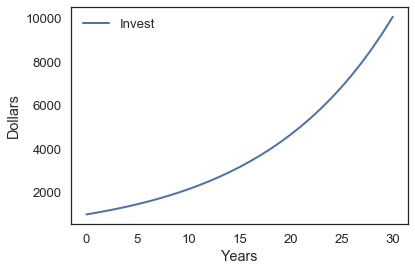

In [8]:
plot(results.T, label='Invest')
decorate(xlabel='Years',
         ylabel='Dollars')

In [9]:
invest.T_final=get_last_value(results.T)
T_final = get_last_value(results.T)

10062.656889073436

In [10]:
invest2 = System(init = init, i = 0.0001, t_0=0, t_end=30)
results2 = run_simulation(invest2, update_func)

,T
0,1000
1,1000.1
2,1000.2
3,1000.3
4,1000.4
5,1000.5
6,1000.6
7,1000.7
8,1000.8
9,1000.9


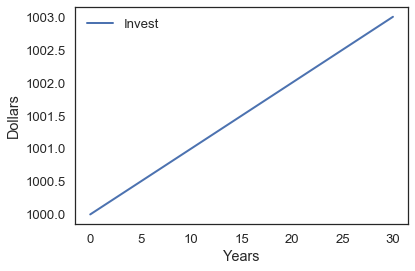

In [11]:
plot(results2.T, label='Invest')
decorate(xlabel='Years',
         ylabel='Dollars')

In [12]:
invest2.T_final=get_last_value(results2.T)
T_final2 = get_last_value(results2.T)

1003.004354062742

In conclusion, with an initial investment of 1000 dollars, investing in the stock market yields a higher return in our money through 30 years. We see an exponential growth with the higher interest rate vs a linear growth with the saving account rate of 0.01.